In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA CLEANING

In [3]:
#READING THE CSV FILES
df=pd.read_csv("data/car_prices.csv")


In [4]:
#DROP DUPLICATES
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 72.5+ MB


In [6]:
df.isna().mean()*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

In [7]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [8]:
df.to_csv('C:\\Users\\ADMIN\\Documents\\training_project\\car_prices_dataset\\data.csv', index=False)


In [9]:
df['condition'].fillna(df['condition'].median(),inplace=True)
df['odometer'].fillna(df['odometer'].median(),inplace=True)
df['mmr'].fillna(df['mmr'].median(),inplace=True)
df['sellingprice'].fillna(df['sellingprice'].median(),inplace=True)

In [10]:
df.isna().mean()*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        0.000000
odometer         0.000000
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.002147
dtype: float64

In [11]:
for column in df:
    if df[column].isna().mean()<0.03:
        df.dropna(subset=[column],inplace=True)

In [12]:
df['transmission'].fillna('unknown',inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544805 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          544805 non-null  int64  
 1   make          544805 non-null  object 
 2   model         544805 non-null  object 
 3   trim          544805 non-null  object 
 4   body          544805 non-null  object 
 5   transmission  544805 non-null  object 
 6   vin           544805 non-null  object 
 7   state         544805 non-null  object 
 8   condition     544805 non-null  float64
 9   odometer      544805 non-null  float64
 10  color         544805 non-null  object 
 11  interior      544805 non-null  object 
 12  seller        544805 non-null  object 
 13  mmr           544805 non-null  float64
 14  sellingprice  544805 non-null  float64
 15  saledate      544805 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 70.7+ MB


# HANDLIG OUTLIERS

In [14]:
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1
IQR
outliers=df[(df['odometer']<(Q1-1.5*IQR)) | (df['odometer']>(Q3+1.5*IQR))]

In [15]:
# REMOVING THE OUTLIERS
df = df[(df['odometer'] < (Q3 + 1.5 * IQR)) & (df['odometer'] > (Q1 - 1.5 * IQR))]

# DATA ANALYSIS

Histogram to visualize the dstribution of numerical features

In [18]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'sellingprice' is the column name
selling_price_frequency = df['sellingprice'].value_counts()

# Display the frequency of each selling price
print(selling_price_frequency)


11000.0    4383
12000.0    4374
13000.0    4271
10000.0    3961
14000.0    3848
           ... 
6999.0        1
7001.0        1
1005.0        1
64300.0       1
16676.0       1
Name: sellingprice, Length: 1867, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

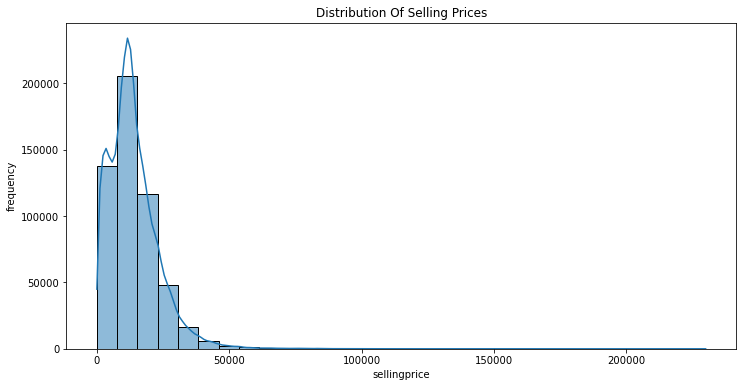

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(df['sellingprice'],bins=30,kde=True)
plt.title('Distribution Of Selling Prices')
plt.xlabel('sellingprice')
plt.ylabel('frequency')
plt.show

boxplots:to identify outliers and understand the spread of ur data
Interpretation:
High outliers might represent premium models, unusual demand, or rare versions of a vehicle in that condition.
Low outliers could indicate distressed sales, vehicles with hidden defects, or perhaps data entry errors.

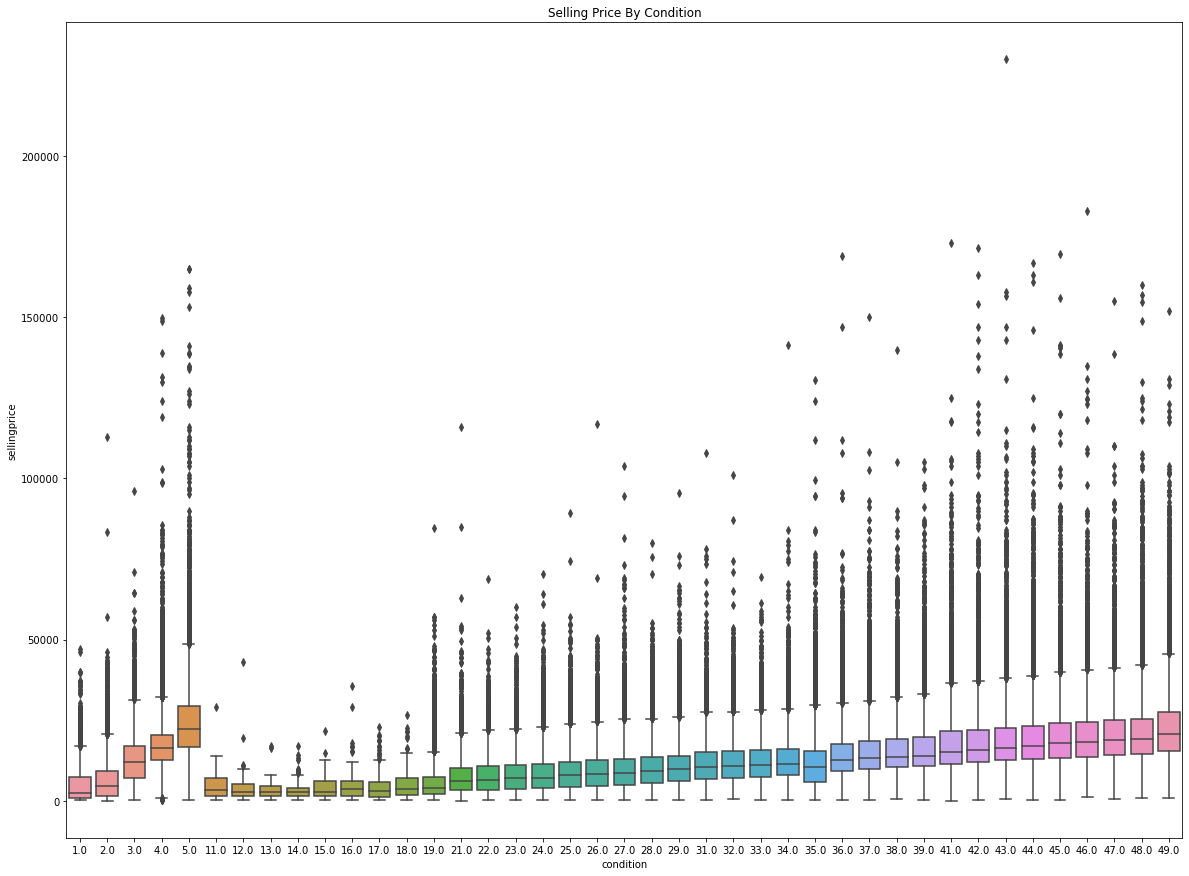

In [21]:
plt.figure(figsize=(20,15))
sns.boxplot(x='condition',y='sellingprice',data=df)
plt.title('Selling Price By Condition')
plt.show()

scatter plots:To visualize relatinships between two numerical variables

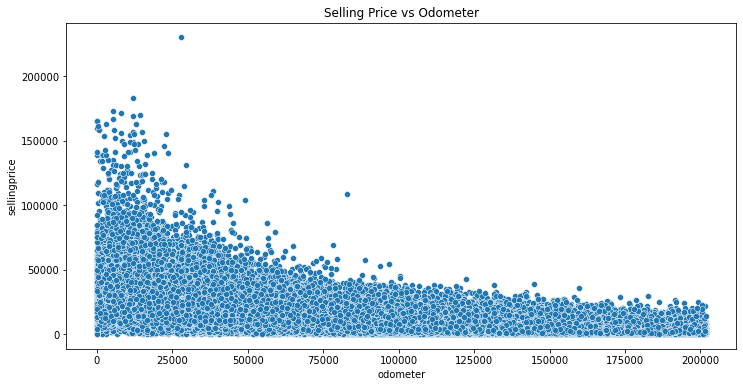

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='odometer',y='sellingprice',data=df)
plt.title('Selling Price vs Odometer')
plt.xlabel('odometer')
plt.ylabel('sellingprice')
plt.show()

Categorical Data Analysis
use count plots to see their distribution

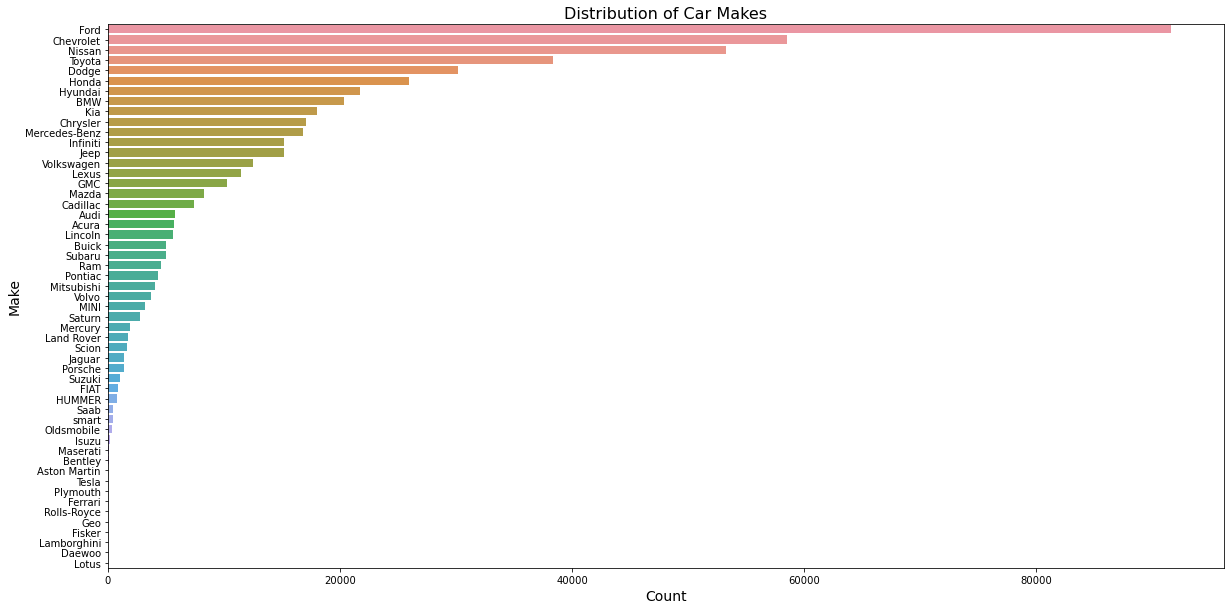

In [29]:
plt.figure(figsize=(20,10))  
sns.countplot(y='make', data=df, order=df['make'].value_counts().index)
plt.title('Distribution of Car Makes', fontsize=16)  
plt.xlabel('Count', fontsize=14)  
plt.ylabel('Make', fontsize=14)   
plt.show()


Correlation matrix

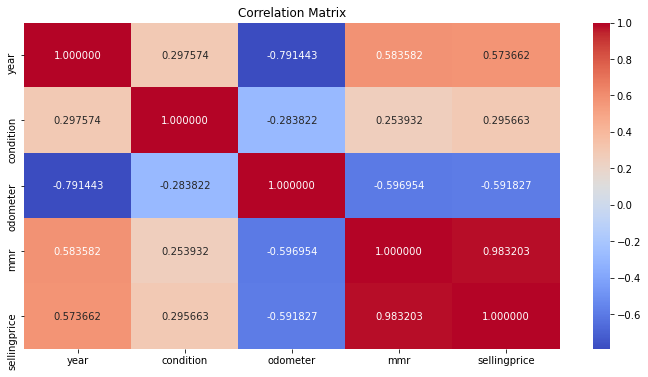

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,fmt='2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Drop rows where 'saledate' has invalid dates
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')  # Coerce invalid dates to NaT (Not a Time)
df = df.dropna(subset=['saledate'])  # Drop rows where 'saledate' is NaT


In [42]:
print(df['saledate'].head())  # Check the first few values of the 'saledate' column
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)

df['saledate'] = df['saledate'].dt.tz_localize(None)


0   2014-12-16 04:30:00+00:00
1   2014-12-16 04:30:00+00:00
2   2015-01-14 20:30:00+00:00
3   2015-01-28 20:30:00+00:00
4   2014-12-18 04:30:00+00:00
Name: saledate, dtype: datetime64[ns, UTC]


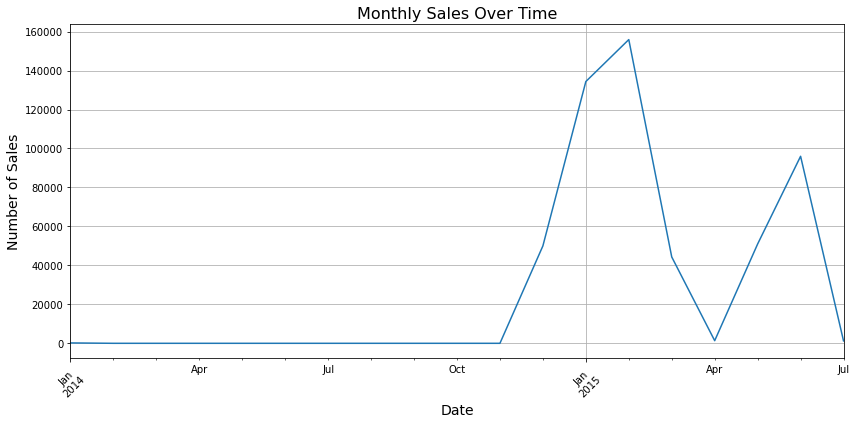

In [43]:
# Now set 'saledate' as index and resample by month
monthly_sales = df.set_index('saledate').resample('M').count()['sellingprice']
monthly_sales.plot(figsize=(12,6))
plt.title('Monthly Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

